# Data Checks

- Schema checks: Making sure that only the columns that are expected are provided.

- Datum checks:
    - Looking for missing values
    - Ensuring that expected value ranges are correct

- Statistical checks:
    - Visual check of data distributions.
    - Correlations between columns.
    - Statistical distribution checks.

# Schema Checks

Schema checks are all about making sure that the data columns that you want to have are all present, and that they have the expecte data types.

We're going to use a few datasets from Boston's open data repository. Let's first take a look at Boston's annual budget data.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## A bit of basic `pandas`

In [2]:
import pandas as pd
df = pd.read_csv('data/boston_budget.csv')
df.head()

,Fiscal Year,Service (Cabinet),Department,Program #,Program,Expense Type,ACCT #,Expense Category (Account),Fund,Amount
0,2014,Mayors Cabinet,Mayor's Office,111100,Administration,Personnel Services,51000,Permanent Employees,General Fund,$797875.00
1,2014,Mayors Cabinet,Mayor's Office,111100,Administration,Personnel Services,51100,Emergency Employees,General Fund,$7823.00
2,2014,Mayors Cabinet,Mayor's Office,111100,Administration,Personnel Services,51600,Unemployment Compensation,General Fund,$16820.00
3,2014,Mayors Cabinet,Mayor's Office,111100,Administration,Contractual Services,52100,Communications,General Fund,$47462.00
4,2014,Mayors Cabinet,Mayor's Office,111100,Administration,Contractual Services,52700,Repairs & Service To Equipment,General Fund,$5171.00


To get the columns of a DataFrame object `df`, call `df.columns`. This is a list-like object that can be iterated over.

In [3]:
df.columns

Index(['Fiscal Year', 'Service (Cabinet)', 'Department', 'Program #',
       'Program', 'Expense Type', 'ACCT #', 'Expense Category (Account)',
       'Fund', ' Amount'],
      dtype='object')

## YAML Files

Describe data in a human-friendly & computer-readable format.

Structure:

```yaml
key1: value
key2:
- value1
- value2
- subkey1:
    - value3
```

Example YAML-formatted schema:

```yaml
filename: boston_budget.csv
column_names:
- "Fiscal Year"
- "Service (cabinet)"
- "Department"
- "Program #"
...
- "Fund"
- "Amount"
```

YAML-formatted text can be read as dictionaries.

In [4]:
spec = """
filename: boston_budget.csv
columns:
- "Fiscal Year"
- "Service (Cabinet)"
- "Department"
- "Program #"
- "Program"
- "Expense Type"
- "ACCT #"
- "Expense Category (Account)"
- "Fund"
- "Amount"
"""

In [5]:
import yaml
metadata = yaml.load(spec)
metadata

{'columns': ['Fiscal Year',
  'Service (Cabinet)',
  'Department',
  'Program #',
  'Program',
  'Expense Type',
  'ACCT #',
  'Expense Category (Account)',
  'Fund',
  'Amount'],
 'filename': 'boston_budget.csv'}

By having things YAML formatted, you preserve human-readability and computer-readability simultaneously. 

Providing metadata should be something already done when doing analytics; YAML-format is a strong suggestion, but YAML schema will depend on use case.

Let's now switch roles, and pretend that we're on side of the "analyst" and are no longer the "data provider". 

How would you check that the columns match the spec? Basically, check that every element in `df.columns` is present inside the `metadata['columns']` list.

In [6]:
for col in df.columns:
    # print(col)
    try:
        assert col in metadata['columns']
    except AssertionError:
        print(f'"{col}" not in metadata columns')

" Amount" not in metadata columns


If there is even a slight mis-spelling, this kind of check will help you pinpoint where that is. Note how the "Amount" column is spelled with an extra space. Where would be the most human-oriented place to correct this? At the data provider stage.

## Exercise

Encode the aforementioned test into a test function named `test_data_columns`. It should only be concerned with the Boston Budget dataset, and should only test whether the columns match the YAML spec.

In [7]:
# Copy to test_datafuncs.py

import yaml
import pandas as pd

def read_metadata(handle):
    with open(handle, 'r+') as f:
        metadata_str = ''.join(l for l in f.readlines())
        return yaml.load(metadata_str)

def test_data_columns():
    metadata = read_metadata('data/metadata_budget.yml')
    df = pd.read_csv('data/boston_budget.csv')
    for col in df.columns:
        assert col in metadata['columns'], f'"{col}" not on metadata spec.'

It is a logical practice to keep one schema spec file per table provided to you. However, it is also possible to take advantage of YAML "documents" to keep multiple schema specs inside a single YAML file. 

The choice is yours - in cases where there are a lot of data files, it may make sense (for the sake of file-system sanity) to keep all of the specs in multiple files that represent logical groupings of data.

## Exercise: Write `YAML` metadata spec.

Put yourself in the shoes of a data provider. Take the `boston_ei.csv` file in the `data/` directory, and make a schema spec file for that file.

## Exercise: Write test for metadata spec.

Next, put yourself in the shoes of a data analyst. Take the schema spec file and write a test for it.

## Exercise: Write meta-test.

Now, let's go "meta". Write a "meta-test" that ensures that every CSV file in the `data/` directory has a schema file associated with it. (The function need not check each schema.) Until we finish filling out the rest of the exercises, this test can be allowed to fail, and we can mark it as a test to skip by marking it with an `@skip` decorator:

```python
@pytest.mark.skip(reason="no way of currently testing this")
def test_my_func():
    ...
```

## Notes

- Point: have trusted copy of schema apart from data file. YAML not necessarily only way.
- If no schema provided, manually create one; this is exploratory data analysis anyways - no effort wasted!

# Datum Checks

Now that we're done with the schema checks, let's do some sanity checks on the data as well. This is my personal favourite too, as some of the activities here overlap with the early stages of exploratory data analysis.

We're going to switch datasets here, and move to a 'corrupted' version of the Boston Economic Indicators dataset. Its file path is: `./data/boston_ei-corrupt.csv`.

In [8]:
import pandas as pd
import seaborn as sns
sns.set_style('white')
%matplotlib inline

df = pd.read_csv('data/boston_ei-corrupt.csv')
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662.0,2986.0,0.572,158.925868,0.0,0.071,0.594,329.0,80000000.0,313107.0,241.600,44.0,11,380000,405,534,134
1,2013,2,1878731.0,2587.0,0.645,165.497062,0.0,0.063,0.591,557.0,360700000.0,1001911.0,1089.314,50.0,10,359500,332,196,13
2,2013,3,2469155.0,3250.0,0.819,187.450000,0.0,0.061,0.591,803.0,343200000.0,820556.0,1036.464,6.0,6,400000,479,12,0
3,2013,4,2551246.0,3408.0,0.855,233.435374,0.0,0.061,0.593,325.0,150000000.0,350000.0,453.000,14.0,8,403000,558,91,24
4,2013,5,2676291.0,3240.0,0.858,237.890210,0.0,0.069,0.597,122.0,222200000.0,457374.0,671.044,12.0,4,425500,809,63,0


### Demo: Visual Diagnostics

We can use a package called `missingno`, which gives us a quick visual view of the completeness of the data. This is a good starting point for deciding whether you need to manually comb through the data or not.

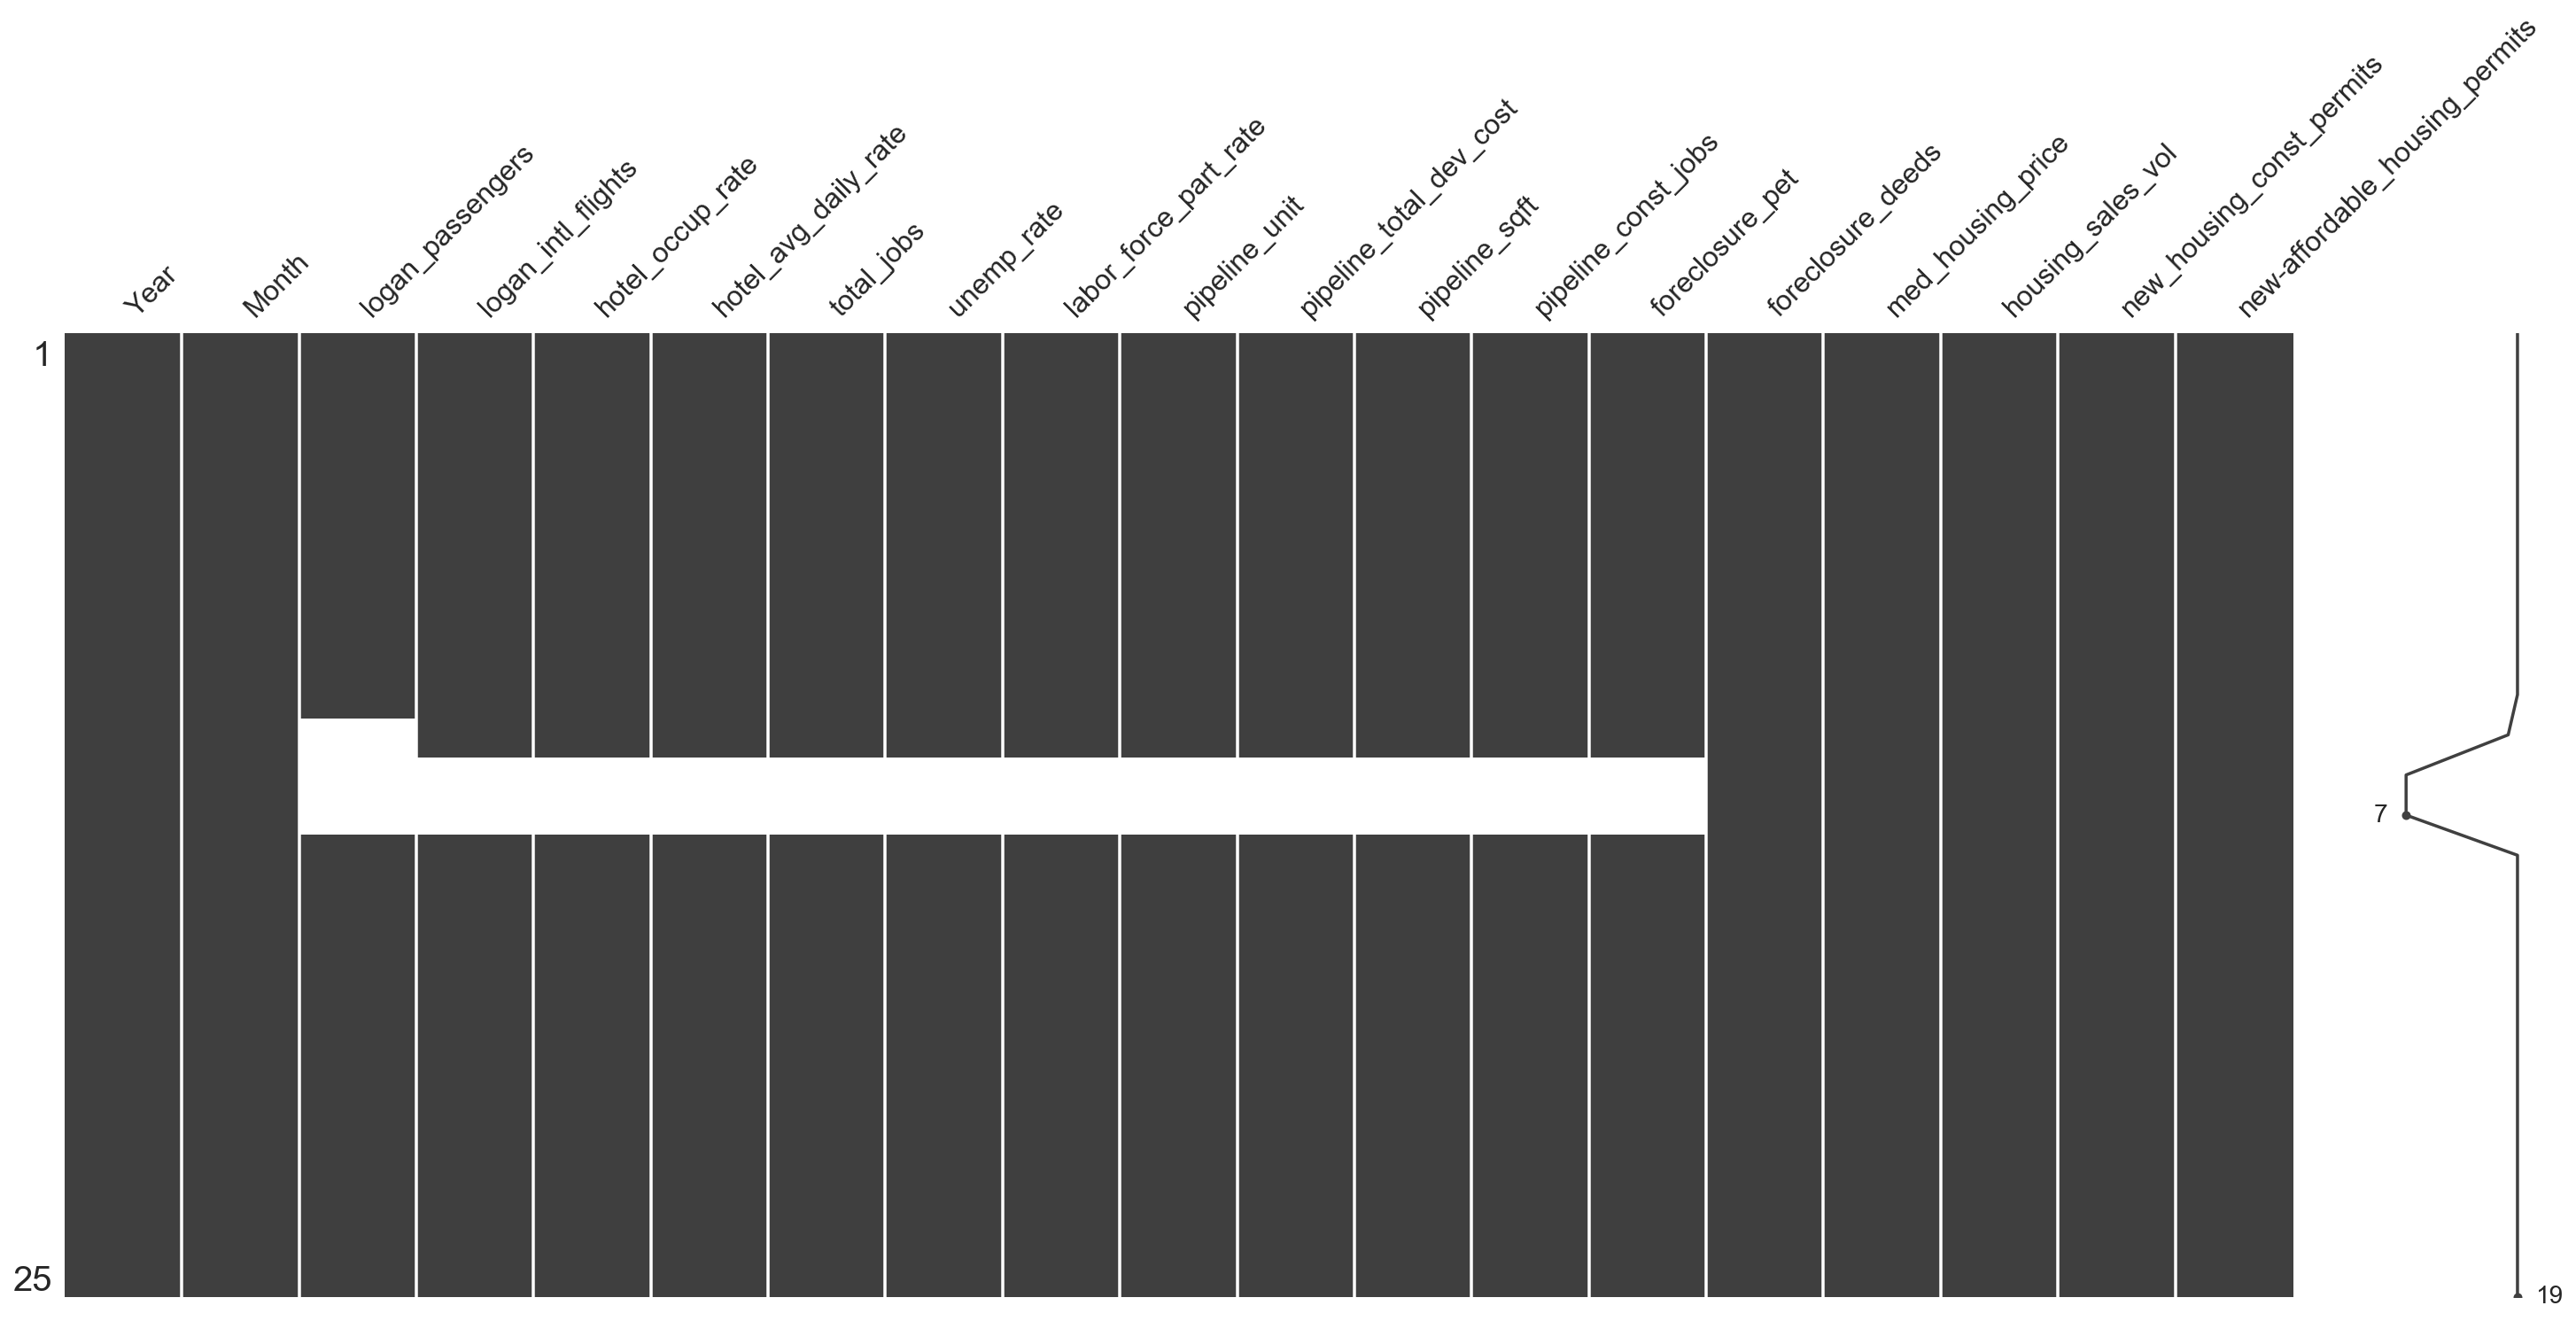

In [9]:
# First, we check for missing data.
import missingno as msno
msno.matrix(df)

Immediately it's clear that there's a number of rows with empty values! Nothing beats a quick visual check like this one.

We can get a table version of this using another package called `pandas_summary`. 

In [10]:
# We can do the same using pandas-summary.
from pandas_summary import DataFrameSummary

dfs = DataFrameSummary(df)
dfs.summary()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
count,25,25,22,23,23,23,23,23,23,23,23,23,23,23,25,25,25,25,25
mean,2013.56,6.28,2.48736e+06,3137,0.792652,221.198,0,0.06,0.577,408.957,3.55608e+08,822970,1074.07,26.0435,8.12,444947,802.8,262.68,50.28
std,0.583095,3.62307,654518,779.062,0.203369,61.6769,0,0.015533,0.126076,366.335,5.01302e+08,946010,1513.88,12.3232,3.11341,31730.9,594.514,212.974,52.2051
min,2013,1,0,0,0,0,0,0,0,0,0,0,0,6,2,359500,332,0,0
25%,2013,3,2.43381e+06,3055.5,0.787,193.05,0,0.056,0.596,132,1.15e+08,331554,348,15,6,429000,459,70,14
50%,2014,6,2.55582e+06,3240,0.881,237.89,0,0.062,0.6,296,1.5175e+08,457374,458,28,8,450000,570,250,38
75%,2014,9,2.81848e+06,3426,0.906,257.559,0,0.069,0.6095,702.5,3.5195e+08,920577,1062.89,35,10,470000,864,399,69
max,2015,12,3.13709e+06,4000,0.931,288.5,0,0.078,0.619,1228,2.3255e+09,4.64204e+06,7023.01,50,14,480000,2508,712,185
counts,25,25,22,23,23,23,23,23,23,23,23,23,23,23,25,25,25,25,25
uniques,3,12,20,21,22,23,1,16,16,21,22,22,22,19,9,20,24,24,20


`dfs.summary()` returns a Pandas DataFrame; can write tests for data completeness.

## Exercise: Test for data completeness.

Write a test that confirms that there's no missing data.

In [11]:
# Add this to test_datafuncs.py
from pandas_summary import DataFrameSummary
def test_data_completeness(df):
    
    df_summary = DataFrameSummary(df).summary()
    for col in df_summary.columns:
        assert df_summary.loc['missing', col] == 0, f'{col} has missing values'

## Exercise: Test for value correctness.

Next, we can sanity-check our data values. 

Basic checks:
- `val >= 0` (positive real numbers)
- `0 <= val <= 1` (fraction/rates/percentages)

Let's write one test that encompasses the [0, 1] scenario.

In [12]:
def test_data_range(df, col):
    if col == 'labor_force_part_rate':  # hard code one condition per column
        assert df[col].min() >= 0, "minimum value less than zero"
        assert df[col].max() <= 1, "maximum value greater than zero"
test_data_range(df, 'labor_force_part_rate')


## Distributions

### Numerical Data

We can take the EDA portion further, by doing an empirical cumulative distribution plot for each data column.

In [13]:
import numpy as np
def compute_dimensions(length):
    """
    Given an integer, compute the "square-est" pair of dimensions for plotting.
    Examples:
    - length: 17 => rows: 4, cols: 5
    - length: 14 => rows: 4, cols: 4
    """
    sqrt = np.sqrt(length)
    floor = int(np.floor(sqrt))
    ceil = int(np.ceil(sqrt))
    
    if floor ** 2 >= length:
        return (floor, floor)
    elif floor * ceil >= length:
        return (floor, ceil)
    else:
        return (ceil, ceil)
    
compute_dimensions(length=17)

assert compute_dimensions(17) == (4, 5)
assert compute_dimensions(16) == (4, 4)
assert compute_dimensions(15) == (4, 4)
assert compute_dimensions(11) == (3, 4)

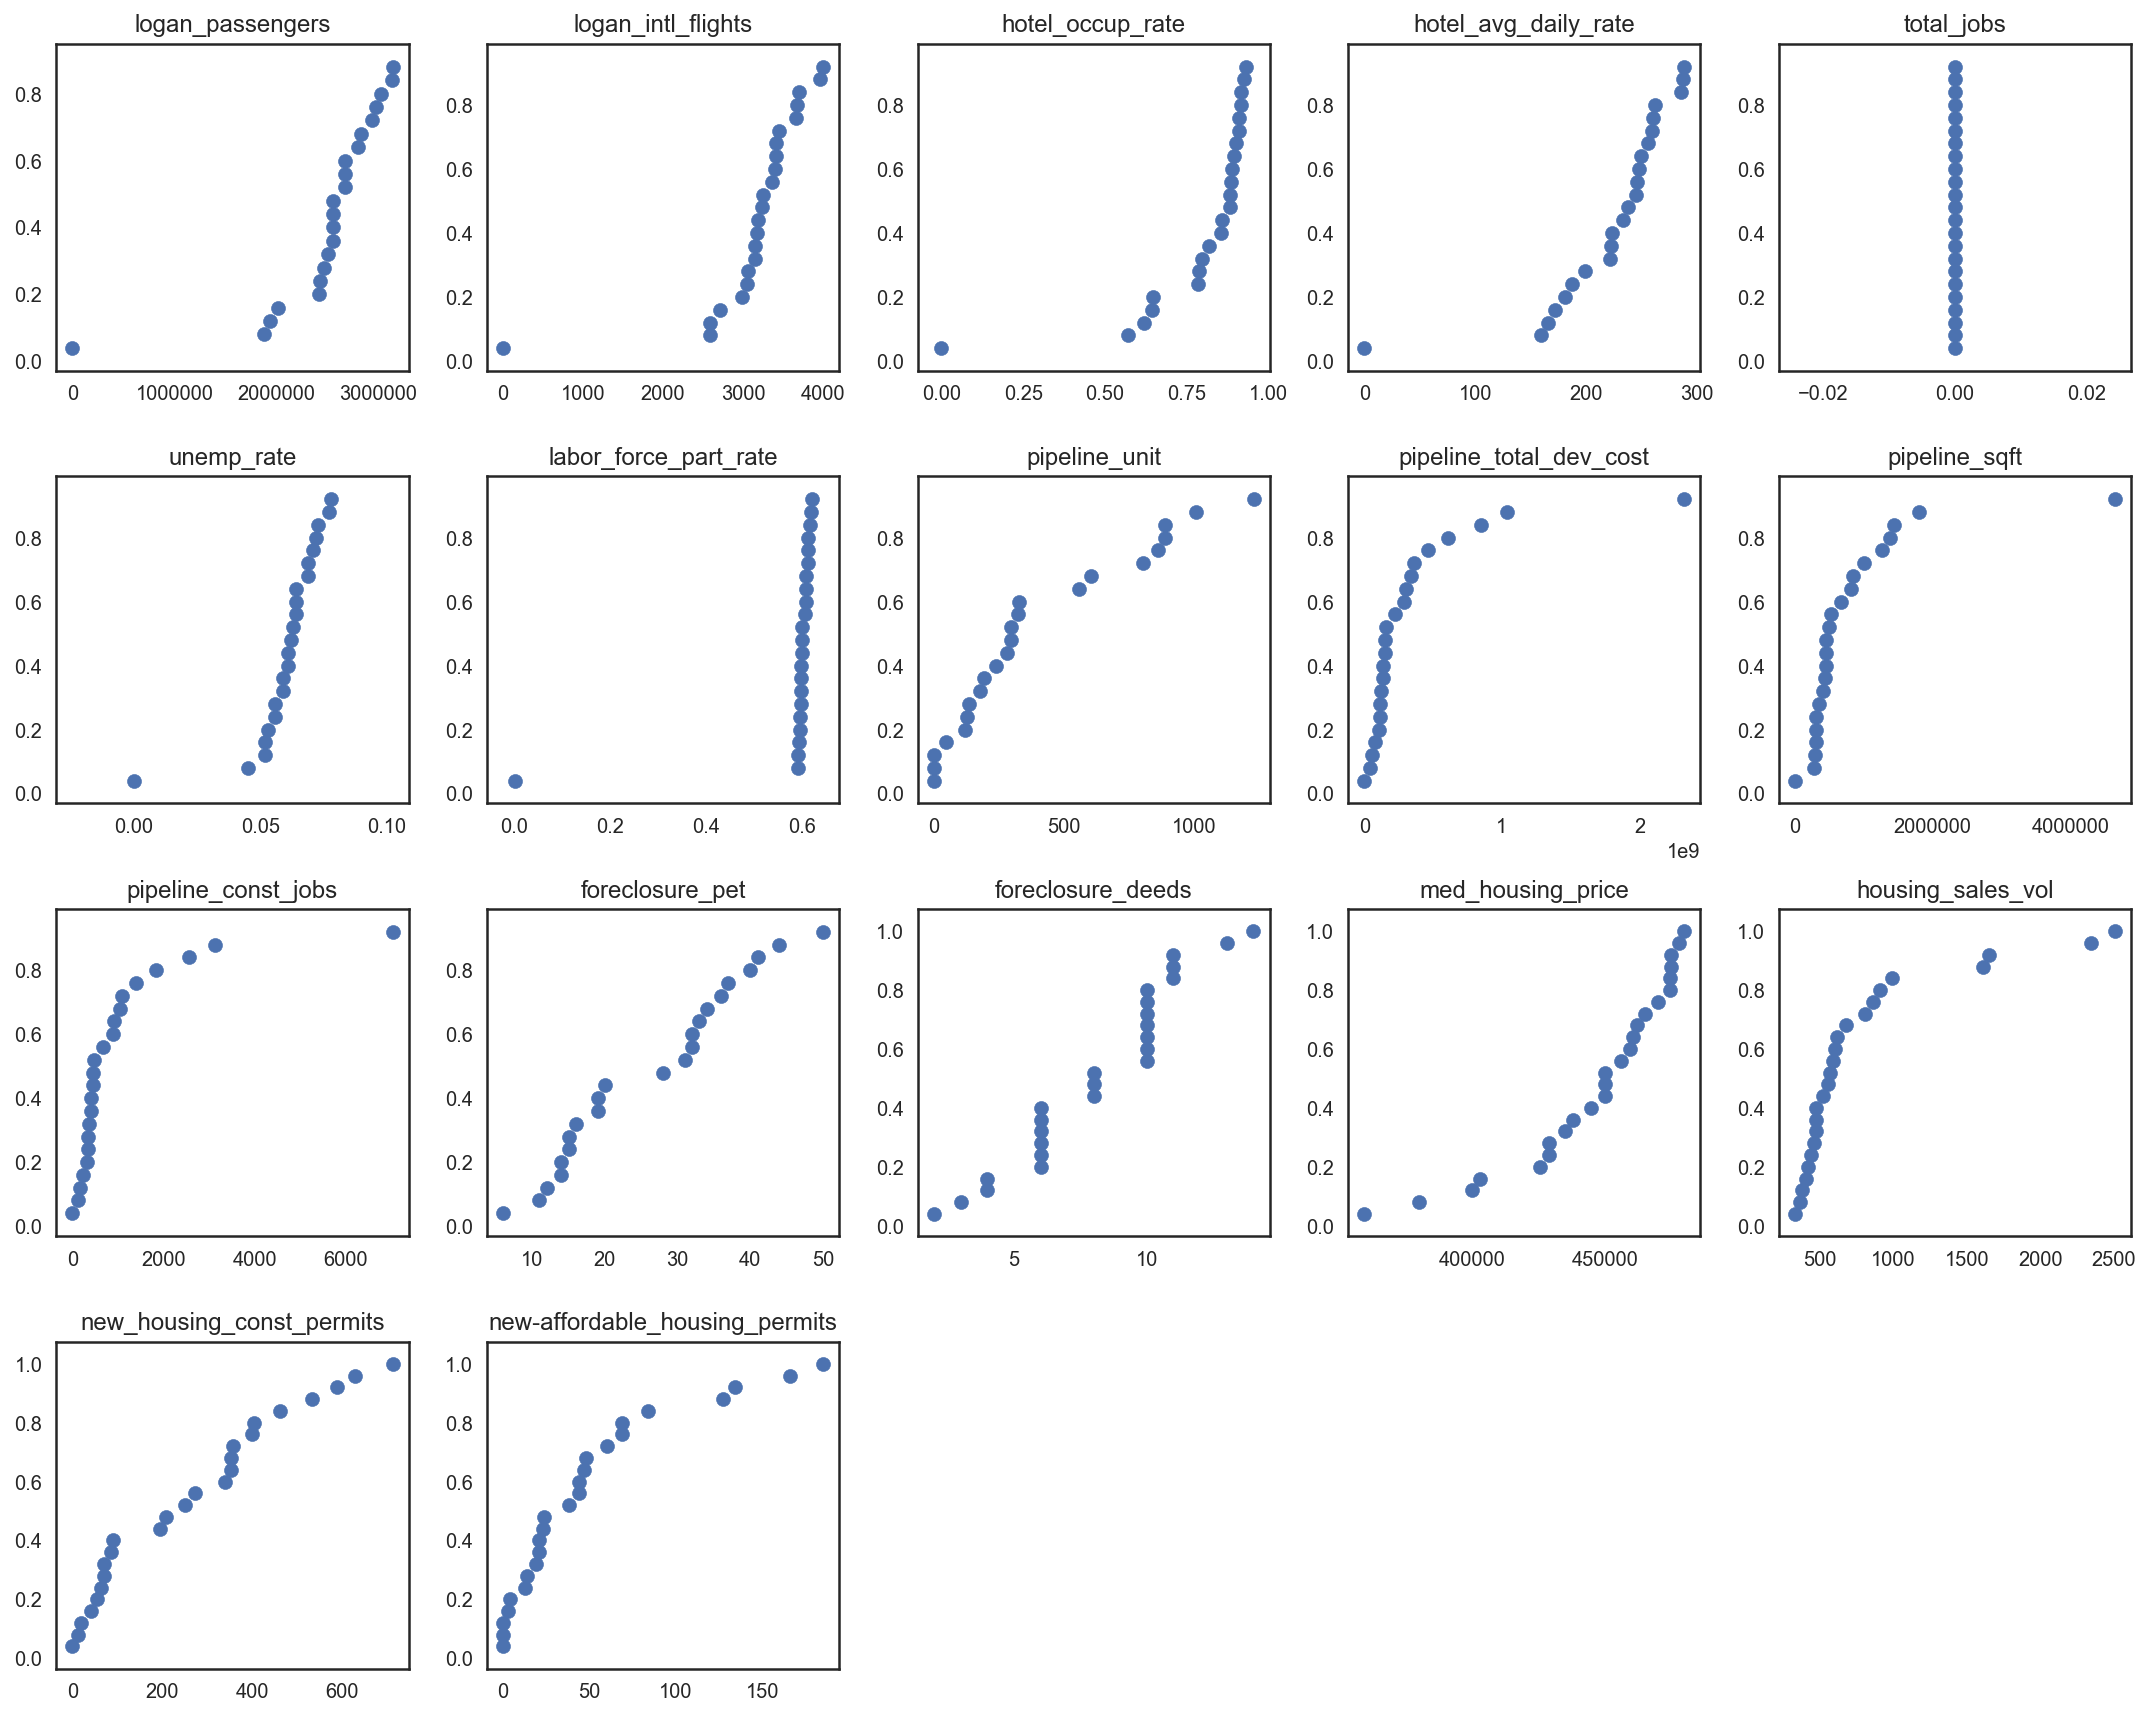

In [14]:
# Next, let's visualize the empirical CDF for each column of data.
import matplotlib.pyplot as plt

def empirical_cumdist(data, ax, title=None):
    """
    Plots the empirical cumulative distribution of values.
    """
    x, y = np.sort(data), np.arange(1, len(data)+1) / len(data)
    ax.scatter(x, y)
    ax.set_title(title)
    
data_cols = [i for i in df.columns if i not in ['Year', 'Month']]
n_rows, n_cols = compute_dimensions(len(data_cols))

fig = plt.figure(figsize=(n_cols*3, n_rows*3))
from matplotlib.gridspec import GridSpec
gs = GridSpec(n_rows, n_cols)
for i, col in enumerate(data_cols):
    ax = plt.subplot(gs[i])
    empirical_cumdist(df[col], ax, title=col)
    
plt.tight_layout()
plt.show()

It's often a good idea to **standardize** numerical data (that aren't count data). The term **standardize** often refers to the statistical procedure of subtracting the mean and dividing by the standard deviation, yielding an empirical distribution of data centered on 0 and having standard deviation of 1.

### Exercise

Write a function that standardizes a column of data. Then, write a test for this function.

**Note:** This function is implemented in the `scikit-learn` library as part of their `preprocessing` module. However, in case an engineering decision that you make is that you don't want to import an entire library just to use one function, you can re-implement it on your own.

In [24]:
def standard_scaler(x):
    return (x - x.mean()) / x.std()

def test_standard_scaler(x):
    std = standard_scaler(x)
    assert np.allclose(std.mean(), 0)
    assert np.allclose(std.std(), 1)
    
test_standard_scaler(np.arange(10))

### Exercise

Now, plot the grid of standardized values.

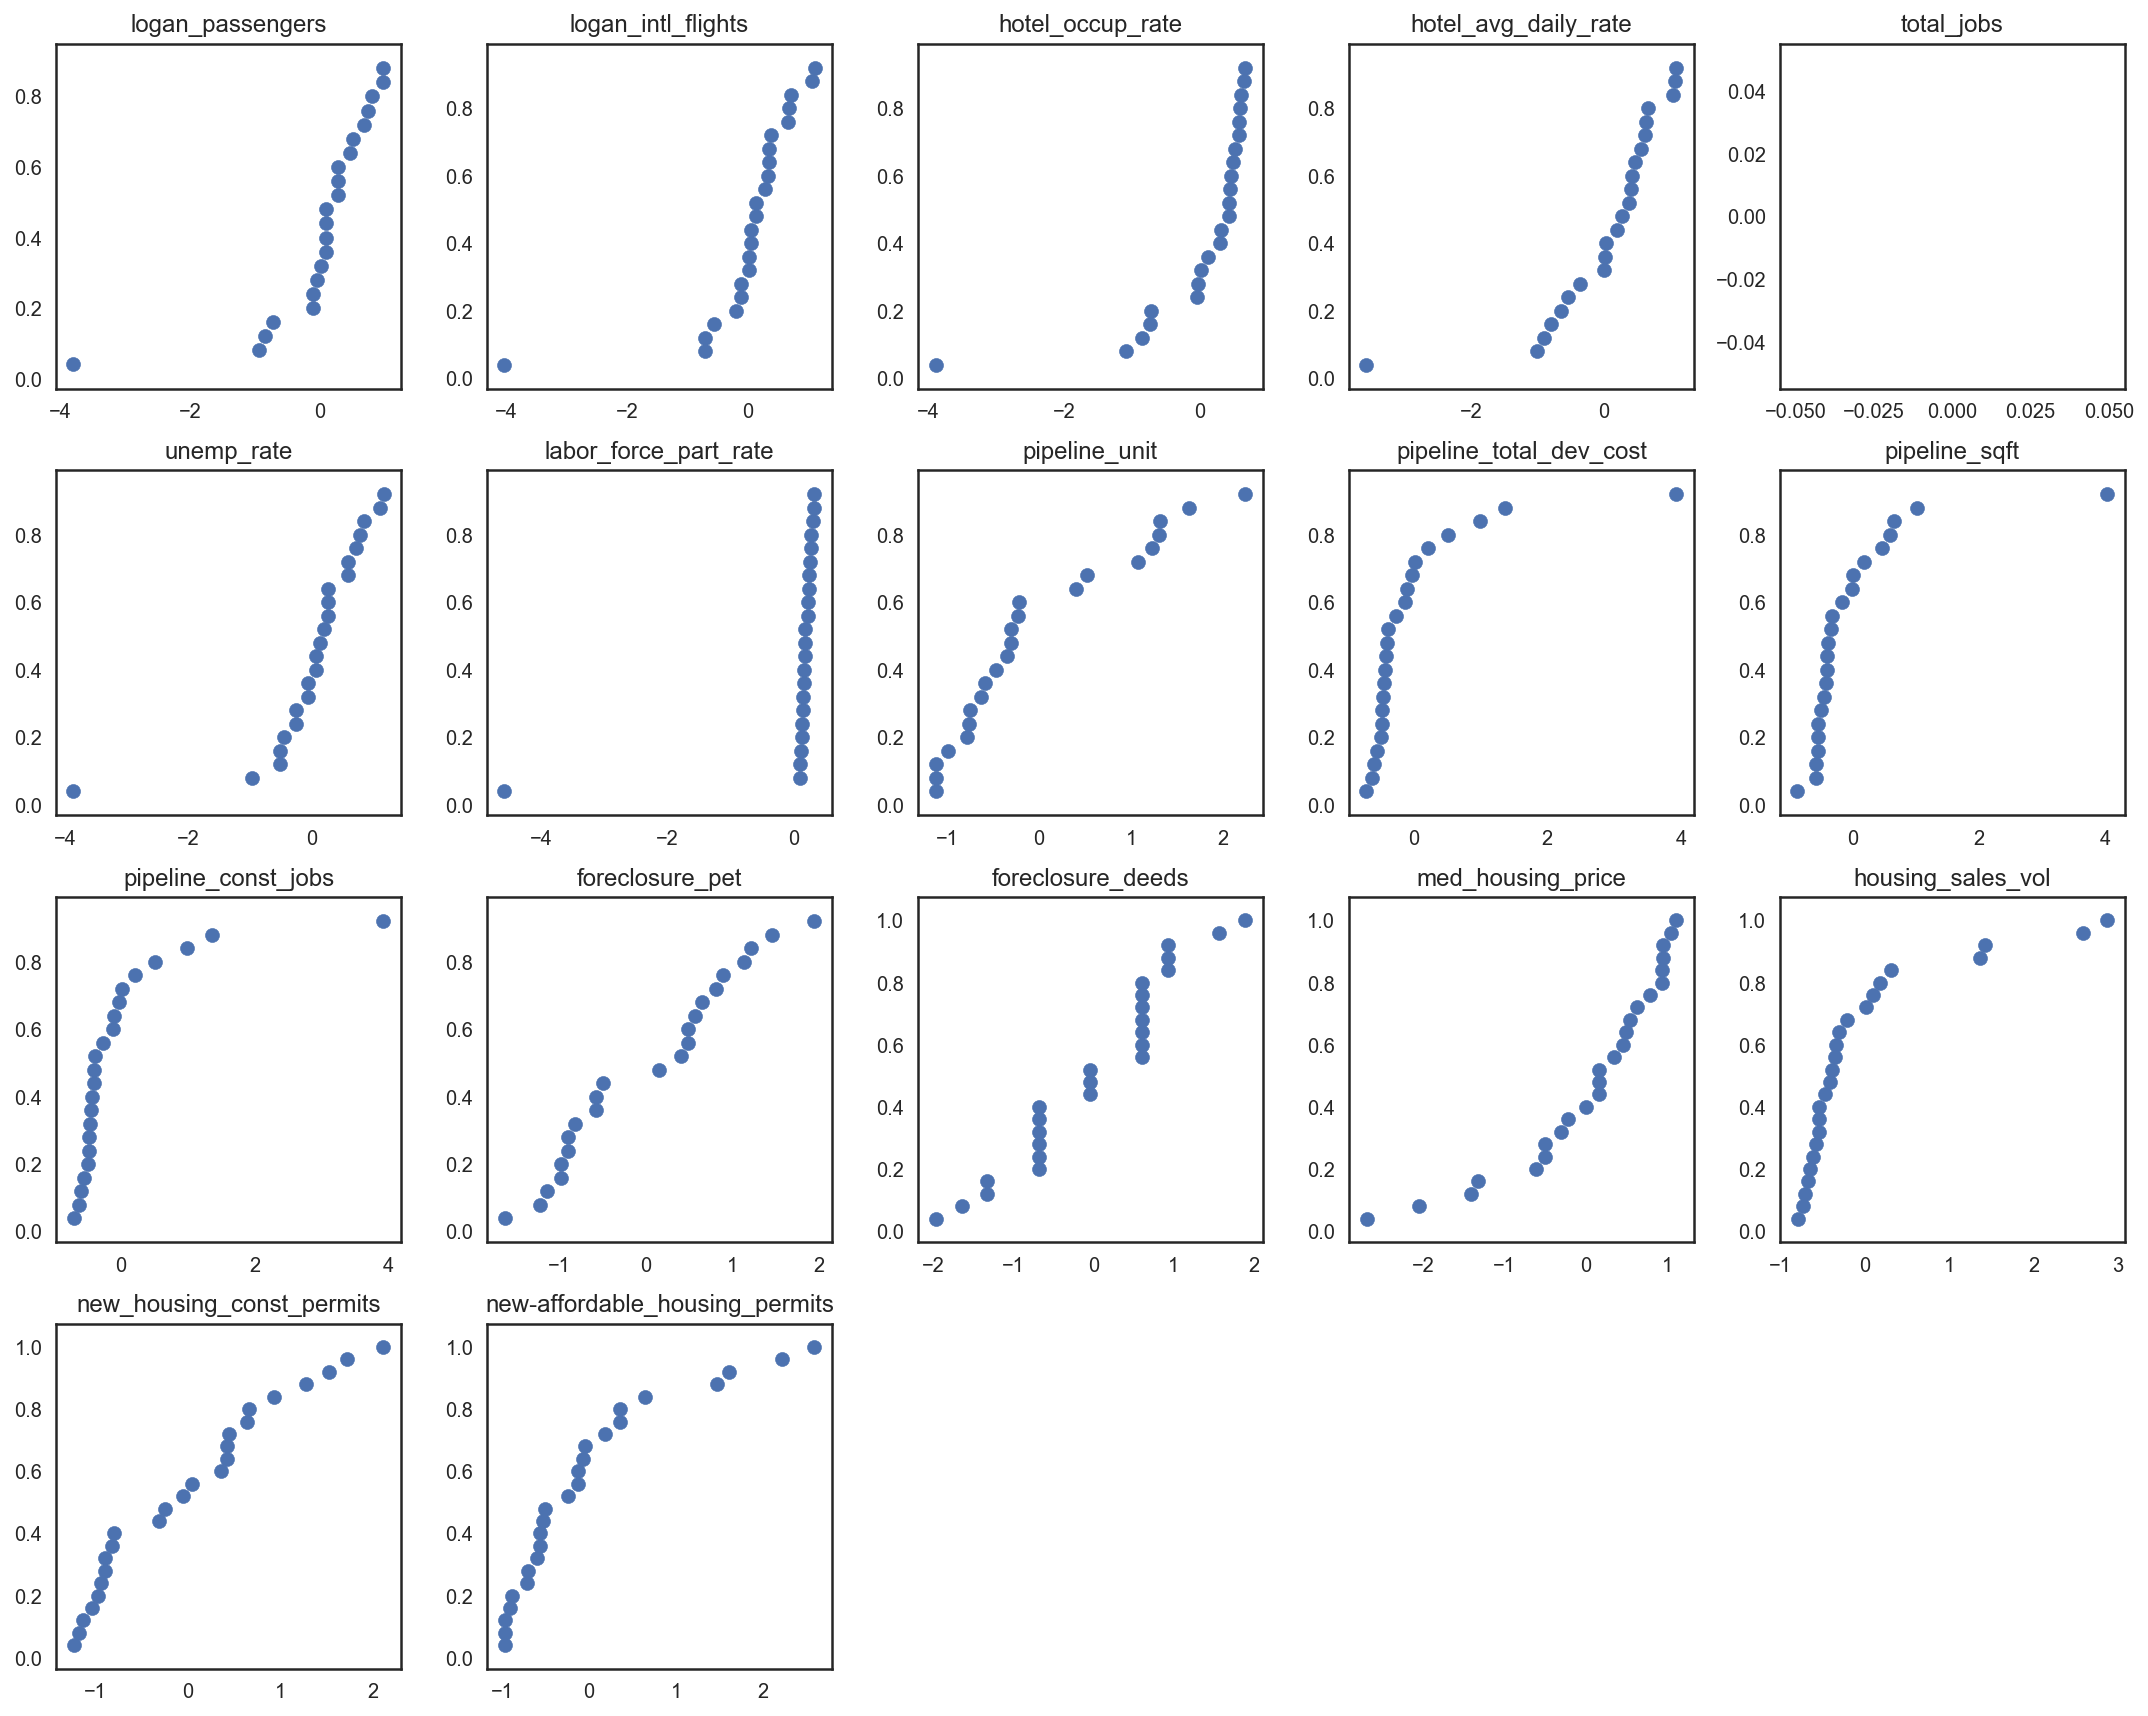

In [25]:
data_cols = [i for i in df.columns if i not in ['Year', 'Month']]
n_rows, n_cols = compute_dimensions(len(data_cols))

fig = plt.figure(figsize=(n_cols*3, n_rows*3))
from matplotlib.gridspec import GridSpec
gs = GridSpec(n_rows, n_cols)
for i, col in enumerate(data_cols):
    ax = plt.subplot(gs[i])
    empirical_cumdist(standard_scaler(df[col]), ax, title=col)
    
plt.tight_layout()
plt.show()

### Categorical Data

For categorical-type data, we can plot the empirical distribution as well. (This example uses the `smartphone_sanitization.csv` dataset.)

Counter({'phone': 61, 'case': 61, 'junction': 60})


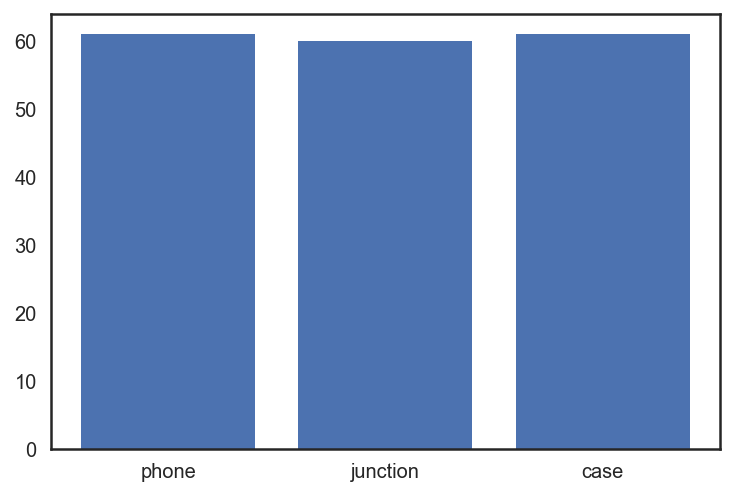

In [15]:
from collections import Counter

def empirical_catdist(data, ax, title=None):
    d = Counter(data)
    print(d)
    x = range(len(d.keys()))
    labels = list(d.keys())
    y = list(d.values())
    ax.bar(x, y)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

smartphone_df = pd.read_csv('data/smartphone_sanitization.csv')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
empirical_catdist(smartphone_df['site'], ax=ax)

# Statistical Checks

- Report on deviations from normality.

## Normality?!

- The Gaussian (Normal) distribution is commonly assumed in downstream statistical procedures, e.g. outlier detection.
- We can test for normality by using a K-S test.

## K-S test

From Wikipedia:

> In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). It is named after Andrey Kolmogorov and Nikolai Smirnov.

![](https://upload.wikimedia.org/wikipedia/commons/c/cf/KS_Example.png)

In [16]:
from scipy.stats import ks_2samp
import numpy.random as npr

# Simulate a normal distribution with 10000 draws.
normal_rvs = npr.normal(size=10000)
result = ks_2samp(normal_rvs, df['labor_force_part_rate'].dropna())
result.pvalue < 0.05

True

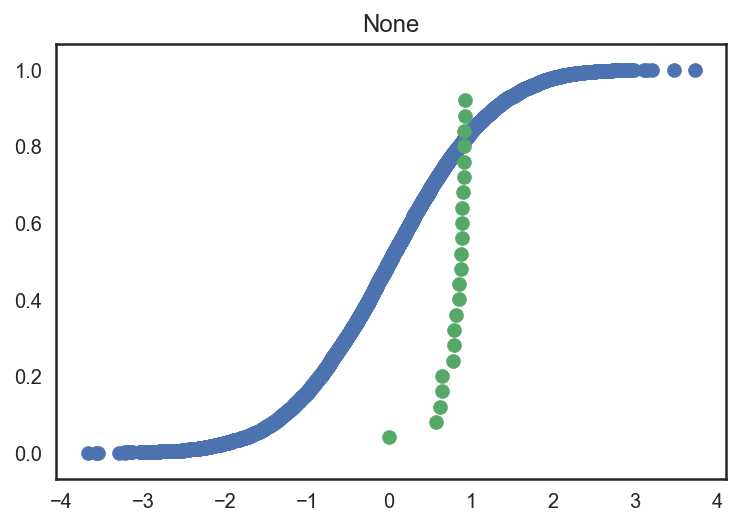

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
empirical_cumdist(normal_rvs, ax=ax)
empirical_cumdist(df['hotel_occup_rate'], ax=ax)

## Exercise

Re-create the panel of cumulative distribution plots, this time adding on the Normal distribution, and annotating the p-value of the K-S test in the title.

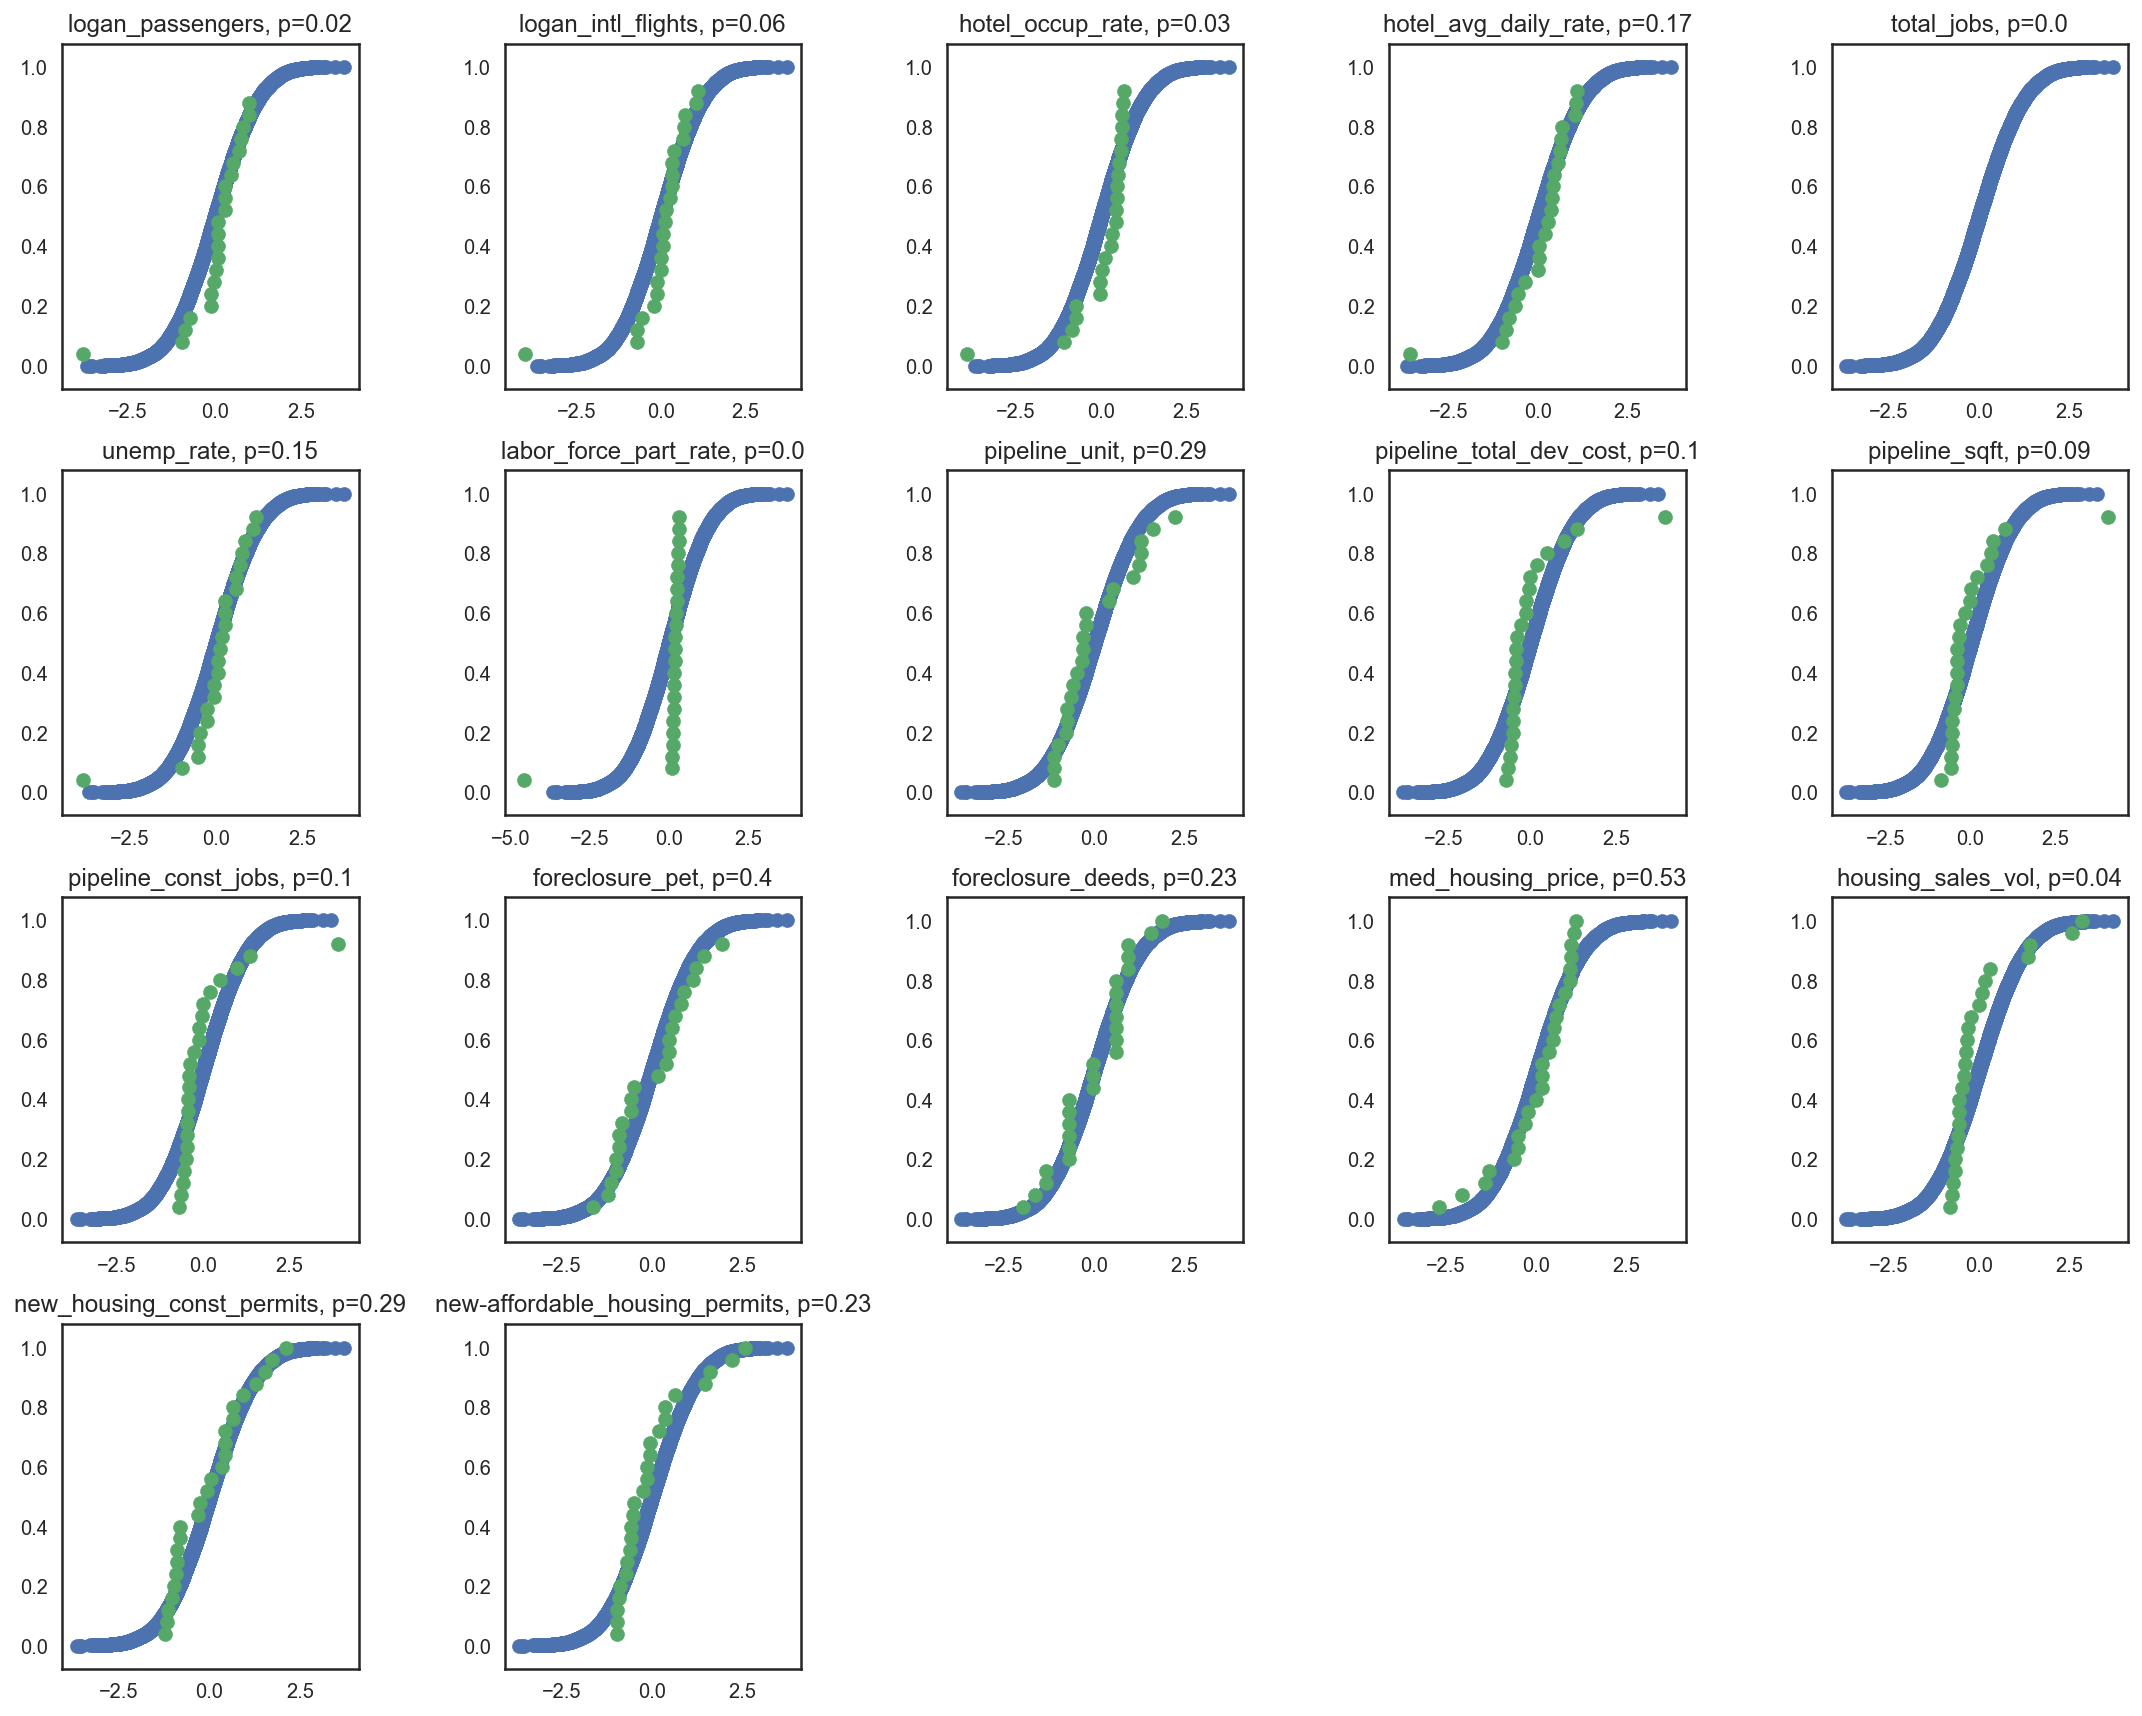

In [36]:
data_cols = [i for i in df.columns if i not in ['Year', 'Month']]
n_rows, n_cols = compute_dimensions(len(data_cols))

fig = plt.figure(figsize=(n_cols*3, n_rows*3))
from matplotlib.gridspec import GridSpec
gs = GridSpec(n_rows, n_cols)
for i, col in enumerate(data_cols):
    ax = plt.subplot(gs[i])
    test = ks_2samp(normal_rvs, standard_scaler(df[col]))
    empirical_cumdist(normal_rvs, ax)
    empirical_cumdist(standard_scaler(df[col]), ax, title=f"{col}, p={round(test.pvalue, 2)}")
    
plt.tight_layout()
plt.show()